In [1]:
import re
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import RNN
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

2025-07-28 01:40:08.644428: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753666809.001333      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753666809.101334      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
with open('/kaggle/input/lstm-model-data/pg103.txt', 'r', encoding="utf8") as fp1:
    text1=fp1.read()

start_indx1 = text1.find('CHAPTER I.\n')
end_indx1 = text1.find('*** END OF THE PROJECT GUTENBERG EBOOK AROUND THE WORLD IN EIGHTY DAYS ***')

text1 = text1[start_indx1:end_indx1]

with open('/kaggle/input/lstm-model-data/pg17699.txt', 'r', encoding="utf8") as fp2:
    text2=fp2.read()

start_indx2 = text2.find("Since the triumphant")
end_indx2 = text2.find('*** END OF THE PROJECT GUTENBERG EBOOK THE EVOLUTION OF LOVE ***')

text2 = text2[start_indx2:end_indx2]

In [3]:
# Text Cleaning
def clean_text(text):
    # removing special characters like @, #, $, etc
    pattern = re.compile('[^a-zA-z0-9\s]')
    text = re.sub(pattern,'',text)

    # removing digits
    pattern = re.compile('\d+')
    text = re.sub(pattern,'',text)

    # removing new lines
    pattern = re.compile('\n+')
    text = re.sub(pattern,' ',text)

    # removing spaces
    pattern = re.compile('\s+')
    text = re.sub(pattern,' ',text)

    # removing dashes
    pattern = re.compile('_')
    text = re.sub(pattern,'',text)

    # converting text to lower case
    text = text.lower()
    return text

In [4]:
final_text = text1 + text2
cleaned_text = clean_text(final_text)
cleaned_text

'chapter i in which phileas fogg and passepartout accept each other the one as master the other as man mr phileas fogg lived in at no saville row burlington gardens the house in which sheridan died in he was one of the most noticeable members of the reform club though he seemed always to avoid attracting attention an enigmatical personage about whom little was known except that he was a polished man of the world people said that he resembled byronat least that his head was byronic but he was a bearded tranquil byron who might live on a thousand years without growing old certainly an englishman it was more doubtful whether phileas fogg was a londoner he was never seen on change nor at the bank nor in the countingrooms of the city no ships ever came into london docks of which he was the owner he had no public employment he had never been entered at any of the inns of court either at the temple or lincolns inn or grays inn nor had his voice ever resounded in the court of chancery or in th

In [5]:
characters = sorted(list(set(cleaned_text)))

n_to_char = {n:char for n, char in enumerate(characters)}
char_to_n = {char:n for n, char in enumerate(characters)}

In [6]:
X = []
Y = []
length = len(cleaned_text)
seq_length = 100

for i in range(0, length-seq_length, 1):
    sequence = cleaned_text[i:i + seq_length]
    label = cleaned_text[i + seq_length]
    X.append([char_to_n[char] for char in sequence])
    Y.append(char_to_n[label])

In [15]:
X_modified = np.reshape(X, (len(X), seq_length, 1))
X_modified = X_modified / float(len(characters))
Y_modified = to_categorical(Y)

In [16]:
X_train, X_val, Y_train, Y_val = train_test_split(X_modified, Y_modified, test_size=0.2, random_state=18)

In [20]:
model = Sequential()
model.add(LSTM(600, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(Y_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_val, Y_val), batch_size=50)

Epoch 1/20
13954/13954 ━━━━━━━━━━━━━━━━━━━━ 407s 29ms/step - accuracy: 0.2363 - loss: 2.6567 - val_accuracy: 0.3406 - val_loss: 2.2726
Epoch 2/20
13954/13954 ━━━━━━━━━━━━━━━━━━━━ 402s 29ms/step - accuracy: 0.3516 - loss: 2.2276 - val_accuracy: 0.4084 - val_loss: 2.0296
Epoch 3/20
13954/13954 ━━━━━━━━━━━━━━━━━━━━ 401s 29ms/step - accuracy: 0.4144 - loss: 2.0090 - val_accuracy: 0.4488 - val_loss: 1.8905
Epoch 4/20
13954/13954 ━━━━━━━━━━━━━━━━━━━━ 402s 29ms/step - accuracy: 0.4521 - loss: 1.8764 - val_accuracy: 0.4738 - val_loss: 1.8028
Epoch 5/20
13954/13954 ━━━━━━━━━━━━━━━━━━━━ 402s 29ms/step - accuracy: 0.4792 - loss: 1.7740 - val_accuracy: 0.4892 - val_loss: 1.7469
Epoch 6/20
13954/13954 ━━━━━━━━━━━━━━━━━━━━ 401s 29ms/step - accuracy: 0.4973 - loss: 1.7044 - val_accuracy: 0.5006 - val_loss: 1.7045
Epoch 7/20
13954/13954 ━━━━━━━━━━━━━━━━━━━━ 403s 29ms/step - accuracy: 0.5112 - loss: 1.6502 - val_accuracy: 0.5114 - val_loss: 1.6704
Epoch 8/20
13954/13954 ━━━━━━━━━━━━━━━━━━━━ 403s 29ms/s

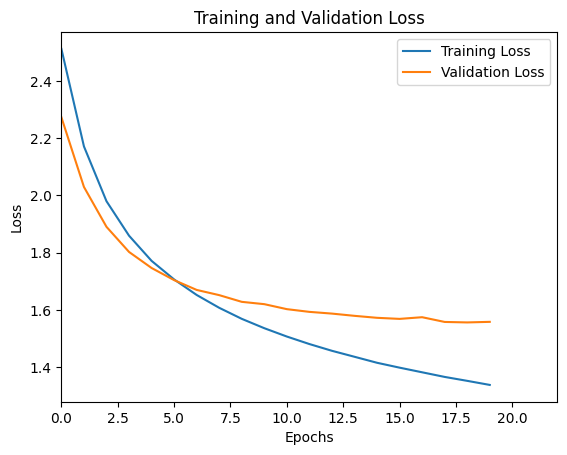

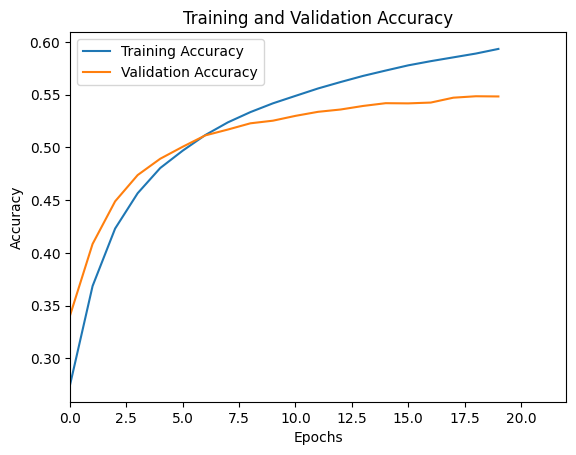

In [23]:
import matplotlib.pyplot as plt

# Plot Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim(0, 22)
plt.legend()
plt.show()

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim(0, 22)
plt.legend()
plt.show()

In [41]:
import numpy as np
import tensorflow as tf

def generate_text(seed_text, num_to_generate=400, temperature=1.0):
    generated_characters = [char for char in seed_text]
    input_indices = [char_to_n[char] for char in seed_text]

    for _ in range(num_to_generate):
        x = np.reshape(input_indices, (1, len(input_indices), 1))
        x = x / float(len(characters)) # Normalize, same as in your original code

        predictions = model.predict(x, verbose=0)[0]
        predictions = tf.math.log(predictions) / temperature
        pred_index = tf.random.categorical(predictions[tf.newaxis, :], num_samples=1)[0, 0].numpy()

        generated_characters.append(n_to_char[pred_index])
        
        input_indices.append(pred_index)
        input_indices = input_indices[1:]

    return "".join(generated_characters)

In [42]:
seed_text = "people said that "
generate_text(seed_text)

'people said that fvolitaew a teadcing she rapgd wellhsgly teelctsle ferr tie pbnurers and bhowsoe artracteot the actoaapter has geslen steo dasgier tends thi tueited thnugh she dedi of aveg po at the strtby au diqooset hopoegates to ce rearet her tome gix sook asrinren tioes the arsinalt of teei hnd tas down he retealed three polshs pe miget ceapeiog benw ane ir when meddriuery to who hare whth ner hhellgngar dose'

In [44]:
seed_text = "i dont believe "
generate_text(seed_text)

'i dont believe hi was ir a feather thene was a packiic tie eafeers the franciscan seanodaree with the refroe purpise sfems rocts the oyhsher of most draw nt repained to phreeac which cane nnt taaheu a toer telfedp thuettinn has soeako the dxaliet of the wases nnen they passed whrhors and satz her grouth it bqevc ln lefbs jeaa would ba etecrdhlg the tprns pf thinrers ftroos in the ceeiric bisheapaly srnakdslles a'